In [1]:
%matplotlib notebook
import subject_DM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Investigating correlations between accumulated evidence and response
It makes sense that the accumulated evidence, which just corresponds to the sum of dot x-coordinates, becomes increasingly correlated with the response of the subject as more and more dots are summed. This is, because, when subjects make 'correct' choices, their choices reflect the mean dot locations and the sum of more and more dots is also an (misscaled) estimate of mean dot location. This is also intuitively clear, because we assume that subjects make decisions based on accumulated evidence. It is, therefore, intrinsically hard to disambiguate signals encoding accumulated evidence and/or the response. At least for early time points accumulated evidence should differ from the response across trials. 

Here I investigate what 'early' means and how strongly accumulated evidence and response are related quantitatively. I simply measure this with the correlation coefficient between the corresponding regressors. I compute the correlation across trials, but within subject, because I typically first run a within-subject analysis/regression.

In [2]:
dots = np.arange(1, 10)
DM = subject_DM.get_trial_DM(dots, r_names=['sum_dot_x', 'response'])
correlations = DM.groupby(level='subject').apply(lambda dm: dm.corr().loc['response'])
del correlations['response']
correlations.columns = pd.Index(dots, name='dot')

<IPython.core.display.Javascript object>


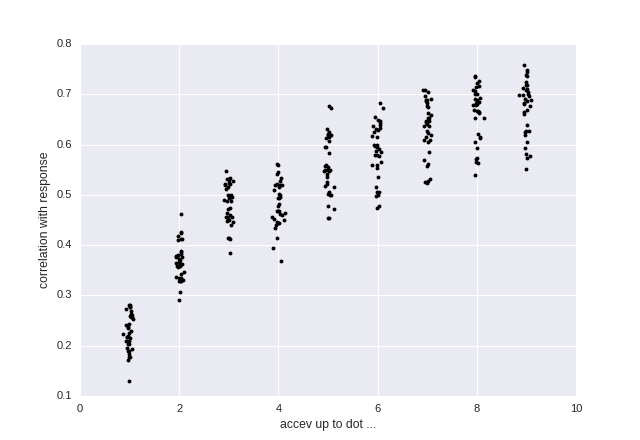

In [3]:
fig, ax = plt.subplots(1)
S = correlations.shape[0]
for dot in dots:
    plt.plot(dot + np.random.randn(S)*0.05, correlations[dot], '.k')
plt.xlabel('accev up to dot ...')
plt.ylabel('correlation with response');

The plot shows that correlations rise with the number of summed dots, as expected. Intuitively, I recognise three larger jumps in correlation: from 1 to 2 dots, from 2 to 3 dots and from 4 to 5 dots. For more than 5 dots the correlations rise gradually, but slower. These jumps in correlation mean that the added dot explains a sizable part of the subjects' responses. This makes sense for the early dots, as we can be pretty sure that subjects consider them for their decisions and actually integrate information from them. It also makes sense that adding the 5th dot considerably increases the correlation, because we originally designed the stimuli such that the 5th dots particularly bias the responses by setting some 5th dot x-locations quite far from the centre. I don't understand why there is no noticable difference between correlations for the 3rd and 4th dots, but perhaps this is also due to our choice of stimuli which have also been selected so that subjects have larger response time and they actually use the 5th dot for their decision. This could mean that, as a side-effect, the 4th dots in these stimuli provide very little information about the decision.

The correlations reach high values above 0.7 for the later dots, but already from the 5th dot correlations tend to be above 0.5. Only for the first two dots the correlations stay mostly below 0.4. This means that linear regression analysis may be susceptible to mixing of the two signals during inference, i.e., the more dots are considered in the accumulated evidence regressor, the more you'd expect that it picks up (part of) the response signal.

## Meaning for the interpretation of accumulated evidence effects
My main motivation for looking at this in detail comes from my results that the motor cortex has strong accumulated evidence effects. So the question is whether this is just an artefact of the eventually executed response, or whether the motor cortex signal actually fluctuates together with accumulated evidence.

I see the accumulated evidence effects in motor cortex both in my whole-trial analysis and the sequential analysis where the regression only includes selected time points. In the whole-trial analysis the number of dots contributing to accumulated evidence depend on the assumed delay after dot onset after which accumulated evidence starts to be represented in cortex. As the delay goes to 0, the number of dots contributing at 900 ms after first dot onset increases. If the motor cortex effects are only driven by the response, they should, therefore, increase, or at least stay stable with decreasing delay, because the correlation between the response and accumulated evidence increases as more dots are added. This is also reflected in the correlations of the corresponding regressors: with delay = 0.1 the correlation between the accumulated evidence and motor response regressors is 0.60 while it is 0.53 for delay = 0.3. Yet, the motor cortex effects are significant with delay = 0.3, but not with delay = 0.1. I interpret this as evidence that the motor cortex indeed contains a signal fluctuating with accumulated evidence, that this signal peaks around 300 ms after dot onset and is independent of the simple preparation of the response.

The sequential analysis also supports this interpretation: I observe strong motor cortex effects for accumulated evidence when I include the first 5 dots in the analysis and when I only include the first 3 dots. This is remarkable, because accumulated evidence in this analysis is defined as the accumulated evidence up to the previous dot so that this analysis only includes accumulated evidence for the sum of the first two dots which, as seen above, has only correlations with the response up to values around 0.4. Also, I observe these effects at 300 and 400 ms after first dot onset which is well before most response times which have a median around 900 ms.